In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]
from tqdm import tqdm

In [2]:
def do_cov_sub_plot(ax, ax_index, C_TT_order, ell_range, ell_p_range):
        
        l_min = ell_range[0]
        l_max = ell_range[1]
        lp_min = ell_p_range[0]
        lp_max = ell_p_range[1]
        C_TT_order = np.where(np.abs(C_TT_order) < 1e-12, 1e-12, np.abs(C_TT_order))

        ell_to_s_map = np.array([l * (l+1) - l - l_min**2  for l in range(l_min, l_max+1)])
        ellp_to_s_map = np.array([l * (l+1) - l - lp_min**2  for l in range(lp_min, lp_max+1)])

        axim = ax.imshow(C_TT_order.T, cmap='inferno', norm=LogNorm(), origin='lower', interpolation = 'nearest')
        
        if l_max-l_min > 20:
            jump = np.array([5, 10, 15, 20])-2
            ax.set_xticks(ell_to_s_map[jump])
            ax.set_xticklabels(np.arange(l_min, l_max+1)[jump])
        else:
            ax.set_xticks(ell_to_s_map)
            ax.set_xticklabels(np.arange(l_min, l_max+1))

        if lp_max-lp_min > 20:
            jump = np.array([5, 10, 15, 20])-2
            ax.set_yticks(ellp_to_s_map[jump])
            ax.set_yticklabels(np.arange(lp_min, lp_max+1)[jump])
        else:
            ax.set_yticks(ellp_to_s_map)
            ax.set_yticklabels(np.arange(lp_min, lp_max+1))

        ax.set_xlim([0, (l_max+1)*(l_max+2) - (l_max+1) - l_min**2 - 1])
        ax.set_ylim([0, (lp_max+1)*(lp_max+2) - (lp_max+1) - lp_min**2 - 1])
        
        ax.set_title('Difference', weight='bold', fontsize='20')
        
        if ax_index == 0 or ax_index == 2:
            ax.set_xlabel(r'$\ell$')
        if ax_index == 0 or ax_index == 2:  
            ax.set_ylabel(r"$\ell'$")
        axim.set_clim(1e-6, 1e0)

        return axim

In [19]:
def get_c_l_from_c_lmlpmp(c_lmlpmp, l_max):
    c_l = np.zeros(l_max+1, dtype=np.complex128)

    one_dim = c_lmlpmp.ndim == 1
    for l in range(2, l_max+1):
        for m in range(-l, l+1):
            if one_dim:
                lm_id = l * (l+1) + m
                c_l[l] += c_lmlpmp[lm_id]
            else:
                lm_id = l * (l+1) + m - 2**2
                c_l[l] += c_lmlpmp[lm_id, lm_id]
        c_l[l] /= 2*l + 1
    return np.real(c_l)

In [62]:
l_max=20
#make corr matrices difference plots (the saved ones are already normalized)
L_101_7=np.load("results2/E1_Lx_1.01_Ly_1.01_Lz_1.01_beta_90_alpha_90_l_max_20_accuracy_99_percent/k_max_list.npy")
print(L_101_7)
L_101_9=np.load("results2/E1_Lx_1.01_Ly_1.01_Lz_1.01_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00151.npy")

L_115=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_0_0.npy")
L_115_1=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00011.npy")
L_115_2=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00021.npy")
L_115_3=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00031.npy")
L_115_4=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00051.npy")
L_115_6=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00071.npy")
L_115_7=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00091.npy")
L_115_8=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00101.npy")
L_115_9=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00151.npy")
L_115_10=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00201.npy")
diff_115_2=L_115_2-L_115
diff_115_4=L_115_4-L_115
diff_115_6=L_115_6-L_115
diff_115_8=L_115_8-L_115
diff_115_9=L_115_9-L_115
diff_115_10=L_115_10-L_115

#only diagonal elements
C_L115_2_diag = get_c_l_from_c_lmlpmp(diff_115_2, l_max)
C_L115_4_diag = get_c_l_from_c_lmlpmp(diff_115_4, l_max)
C_L115_6_diag = get_c_l_from_c_lmlpmp(diff_115_6, l_max)
C_L115_8_diag = get_c_l_from_c_lmlpmp(diff_115_8, l_max)
C_L115_9_diag = get_c_l_from_c_lmlpmp(diff_115_9, l_max)
C_L115_10_diag = get_c_l_from_c_lmlpmp(diff_115_10, l_max)

plot_param={
    'l_ranges': np.array([[2, l_max]]),
    'lp_ranges': np.array([[2,l_max]]),
}

[[0.         0.00305    0.00493992 0.00513077 0.00614463 0.00858981
  0.01000367 0.00919131 0.00841302 0.01168846 0.01264822 0.01324759
  0.01328635 0.00935489 0.01092211 0.01639225 0.01067375 0.01024862
  0.01580395 0.01595262 0.01103627]
 [0.         0.00305    0.06074039 0.06059129 0.06061557 0.06076424
  0.06962313 0.081127   0.08516155 0.08507082 0.08518243 0.08511086
  0.08518584 0.0851377  0.08519734 0.08512364 0.08519861 0.08512023
  0.08519435 0.08513216 0.08518839]]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 28.77it/s]
/tmp/ipykernel_6345/1355627854.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


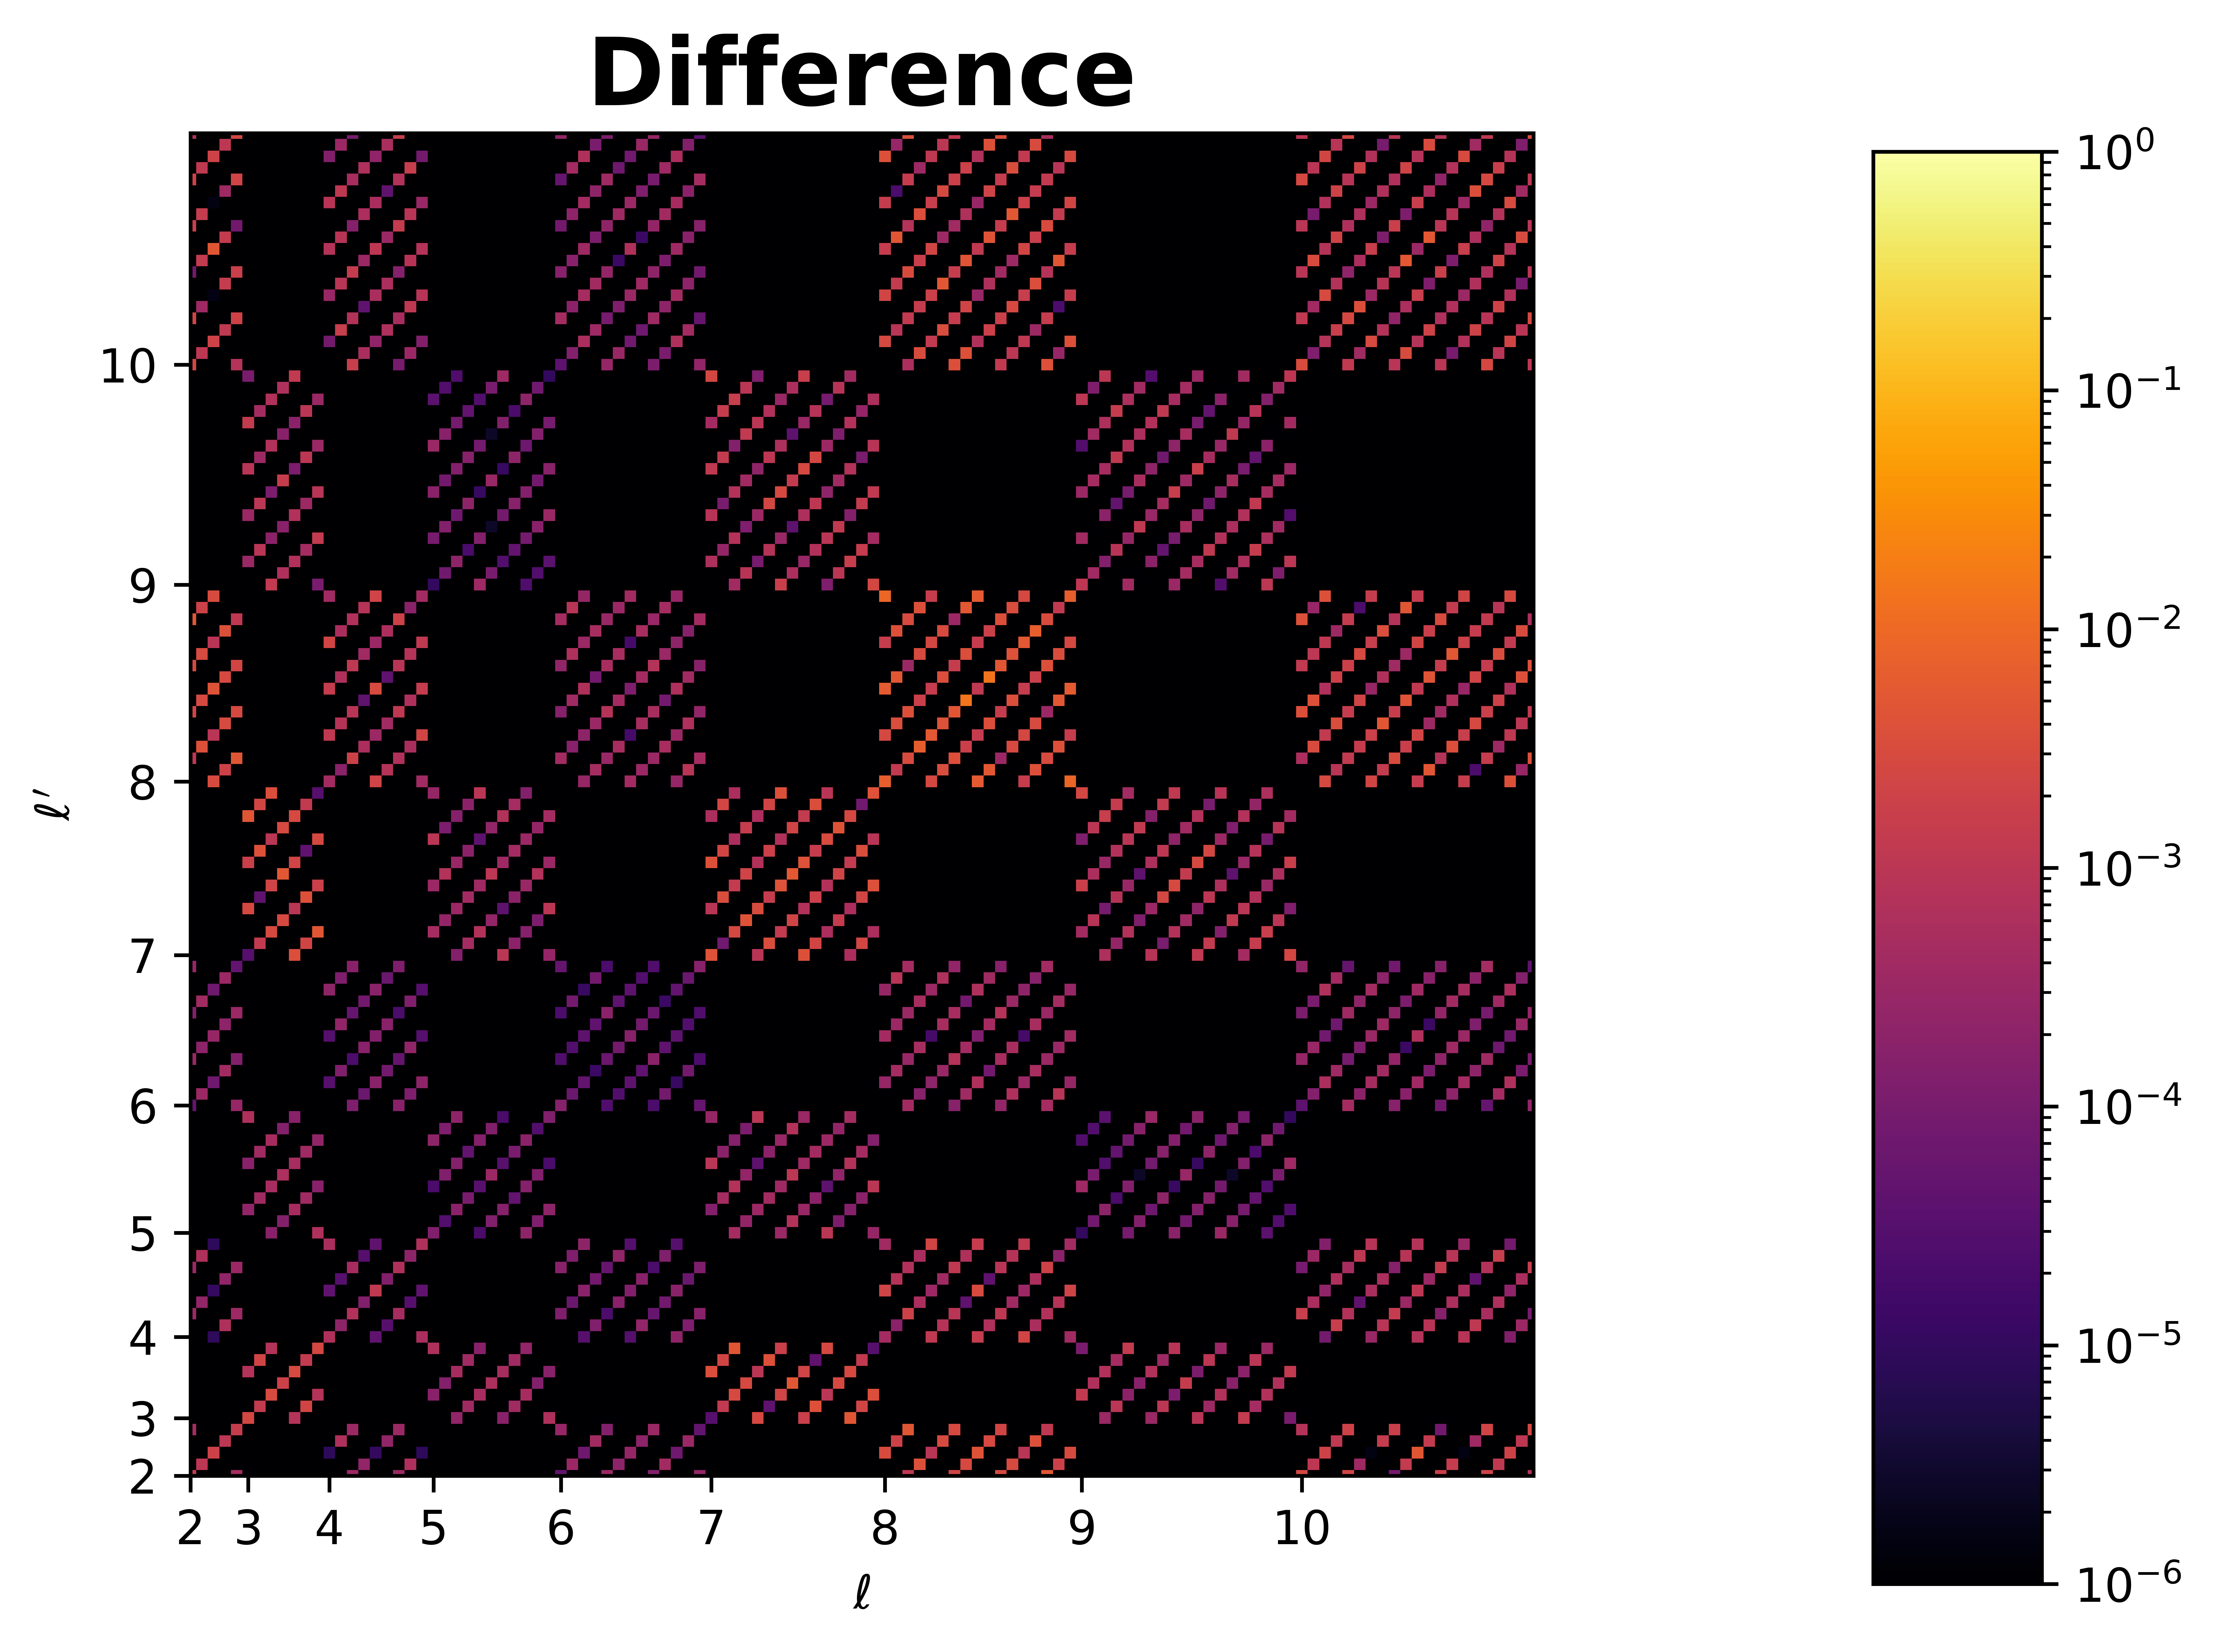

In [16]:
num_plots = plot_param['l_ranges'][:, 0].size
if num_plots == 4:
    ncols=2
    nrows=2
else:
    ncols=1
    nrows = num_plots
fig, ax = plt.subplots(ncols = ncols, nrows = nrows, dpi=500)
axs = np.array(ax)

for i, ax in enumerate(tqdm(axs.reshape(-1))):
    l_min = plot_param['l_ranges'][i, 0]
    l_max = plot_param['l_ranges'][i, 1]
    lp_min = plot_param['lp_ranges'][i, 0]
    lp_max = plot_param['lp_ranges'][i, 1]
    # Make sure the l_ranges do not overlap!
    ell_range = np.array(plot_param['l_ranges'][i, :])
    ell_p_range = np.array(plot_param['lp_ranges'][i, :])                
    im = do_cov_sub_plot(ax, i, diff_115_9, ell_range, ell_p_range)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.8, 0.05, 0.05, 0.85])
fig.colorbar(im, cax=cbar_ax)
fig.subplots_adjust(hspace=.4, wspace=-0.1)
fig.tight_layout()
plt.savefig('diff_115_9.pdf')

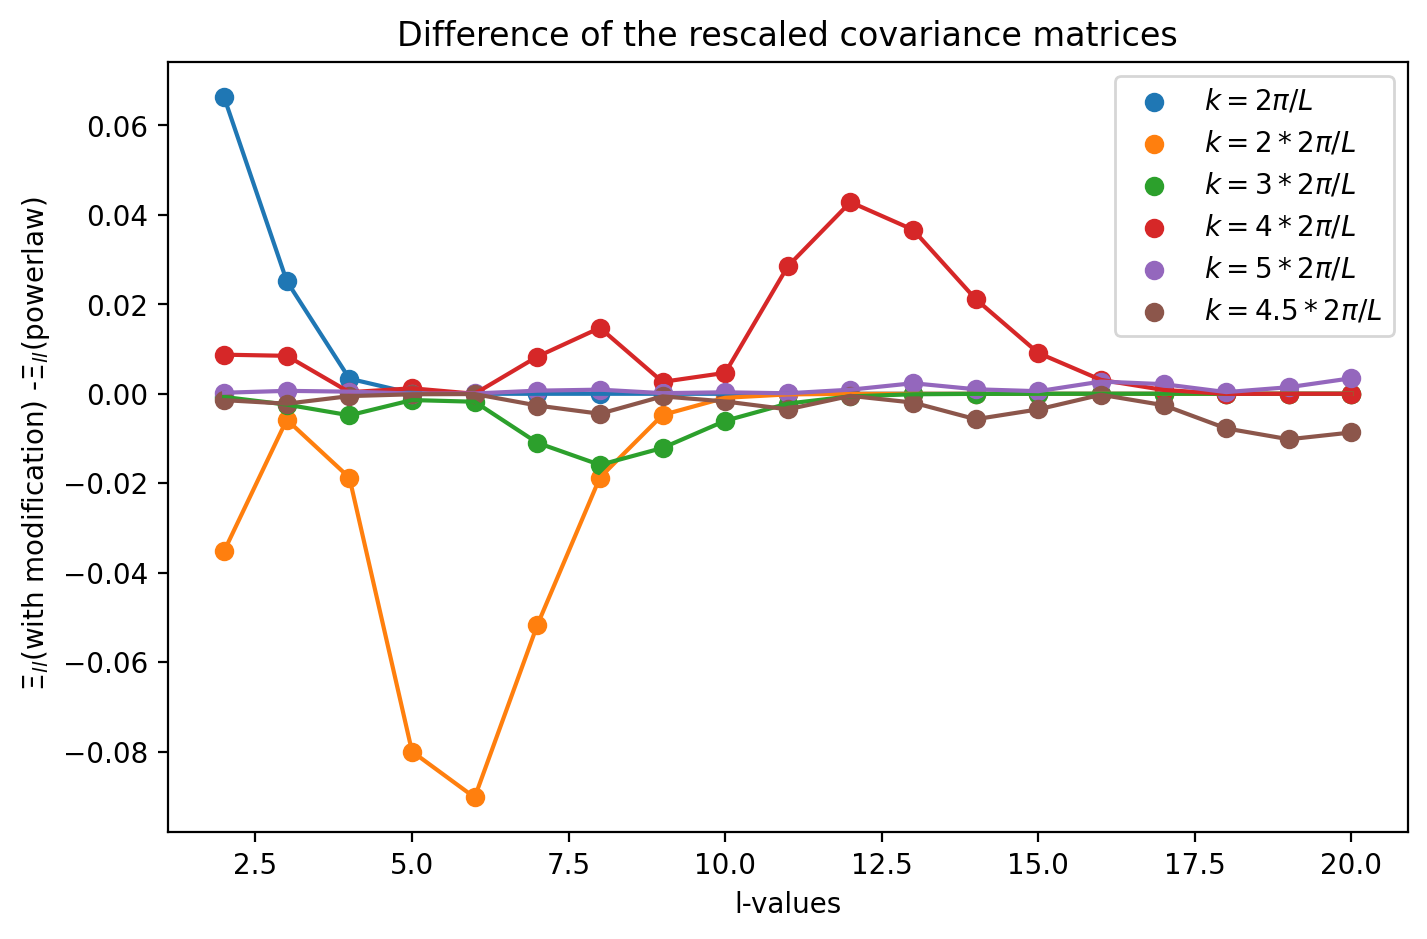

In [61]:
#diagonal plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [8, 5]
l_values=np.arange(2,l_max+1)
plt.plot(l_values, C_L115_2_diag[2:])
plt.scatter(l_values, C_L115_2_diag[2:], label=r'$k=2\pi/L$')
plt.plot(l_values, C_L115_4_diag[2:])
plt.scatter(l_values, C_L115_4_diag[2:], label=r'$k=2*2\pi/L$')
plt.plot(l_values, C_L115_6_diag[2:])
plt.scatter(l_values, C_L115_6_diag[2:], label=r'$k=3*2\pi/L$')
plt.plot(l_values, C_L115_8_diag[2:])
plt.scatter(l_values, C_L115_8_diag[2:], label=r'$k=4*2\pi/L$')
plt.plot(l_values, C_L115_10_diag[2:])
plt.scatter(l_values, C_L115_10_diag[2:], label=r'$k=5*2\pi/L$')
plt.plot(l_values, C_L115_9_diag[2:])
plt.scatter(l_values, C_L115_9_diag[2:], label=r'$k=4.5*2\pi/L$')
plt.ylabel(r' $\Xi_{ll}$(with modification) -$\Xi_{ll}$(powerlaw)')
plt.xlabel("l-values")
plt.title("Difference of the rescaled covariance matrices")
plt.legend()
plt.savefig('diff_115_diag.pdf')